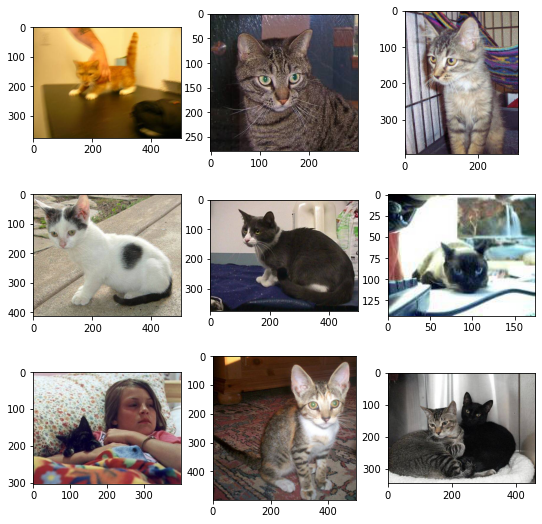

In [3]:
train_cats_dir = '/content/drive/My Drive/ani/cats_and_dogs_small/train/cats'
#plotting the cats data from the train_set
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.image import imread
plt.figure(figsize= (9,9))
for i in range(9):
  #defining the subplot
  plt.subplot(330 + 1 + i)
  image_name = train_cats_dir + '/cat.'+ str(i)+ '.jpg'
  #loading the image
  image = imread(image_name)
  #plotting the image
  plt.imshow(image)


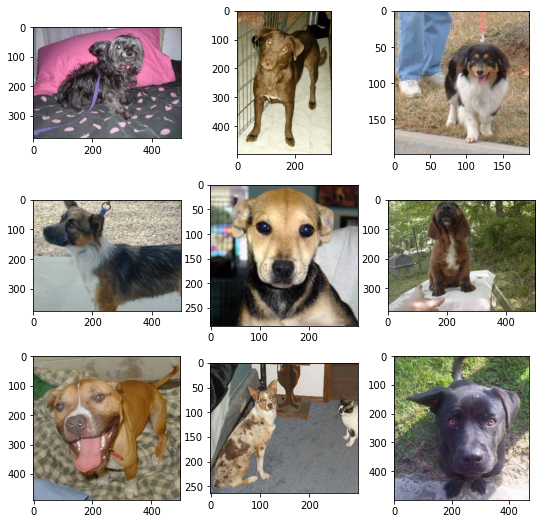

In [2]:
train_dogs_dir = '/content/drive/My Drive/ani/cats_and_dogs_small/train/dogs'
#plotting the dogs data from the train_set
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.image import imread
plt.figure(figsize= (9,9))
for i in range(9):
  #defining the subplot
  plt.subplot(330 + 1 + i)
  image_name = train_dogs_dir + '/dog.'+ str(i)+ '.jpg'
  #loading the image
  image = imread(image_name)
  #plotting the image
  plt.imshow(image)


In [61]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.applications.vgg16 import VGG16
from keras.models import Model

# Instantiating the VGG16 convolutional base
## load model
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(224, 224, 3))
print(conv_base.summary())
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])
train_dir = '/content/drive/My Drive/ani/cats_and_dogs_small/train'
validation_dir = '/content/drive/My Drive/ani/cats_and_dogs_small/validation'
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [63]:
eval_datagen = ImageDataGenerator(rescale=1./255)
eval_dir = '/content/drive/My Drive/ani/cats_and_dogs_small/test'
eval_generator = eval_datagen.flow_from_directory(
        eval_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')
model.evaluate(eval_generator)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 5s 103ms/step - loss: 0.5550 - acc: 0.9090


[0.5549902319908142, 0.9089999794960022]

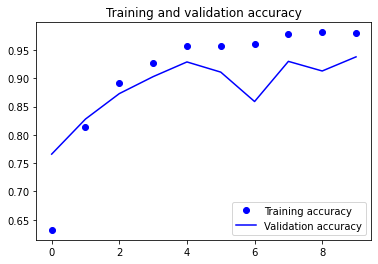

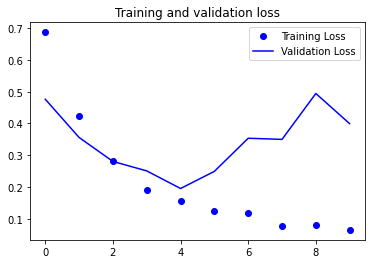

In [64]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

[[0.]]
0.0


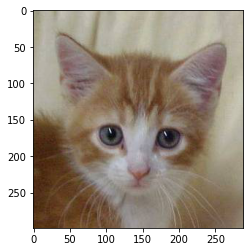

Above image is a cat
--------------------------------------------------------------------------------------
[[0.]]
0.0


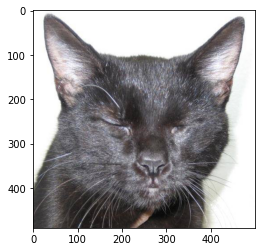

Above image is a cat
--------------------------------------------------------------------------------------
[[1.]]
1.0


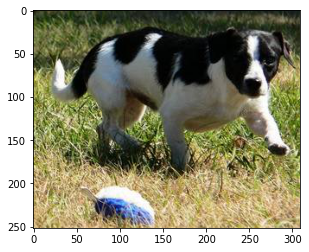

Above image is a dog
-------------------------------------------------------------------------------------
[[1.]]
1.0


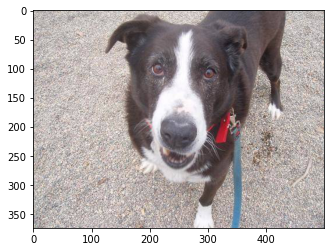

Above image is a dog
-------------------------------------------------------------------------------------
[[1.]]
1.0


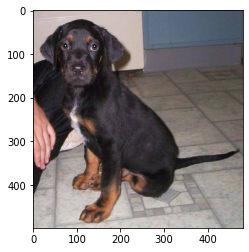

Above image is a dog
-------------------------------------------------------------------------------------
[[0.]]
0.0


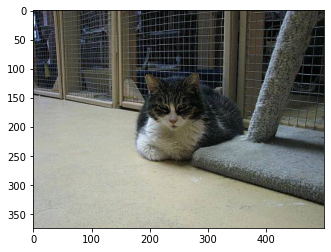

Above image is a cat
--------------------------------------------------------------------------------------


In [62]:
# predicting images
import os
from keras.preprocessing.image import load_img,img_to_array
import numpy as np
import matplotlib.pyplot as plt
from cv2 import imread
from google.colab.patches import cv2_imshow
%matplotlib inline
test_path = '/content/drive/My Drive/ani/test1'
img_name = []
for path in os.listdir(test_path):
  img_name.append(path)
img_dir = img_name[80:86]
for i in img_dir:  
  path_img = test_path + '/' + i
  if path_img == '/tmp/cats_and_dogs_filtered/test/.ipynb_checkpoints':
    continue
  img = load_img(path_img, target_size=(224, 224))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  classes = model.predict(x, batch_size=10)
  print(classes)
  print(classes[0][0])
  import matplotlib.image as mpimg
  image = mpimg.imread(path_img)
  plt.imshow(image)
  plt.show()
  if classes[0][0] == 1:
    print("Above image is a dog")
    print('-------------------------------------------------------------------------------------')
  else:
    print("Above image is a cat")
    print('--------------------------------------------------------------------------------------')